# Web Scraping

In [ ]:
#scrape an html, get text for a particular tag <p> that is about laptop reviews
from bs4 import BeautifulSoup
html_file= open('index.html', 'r')
page= html_file.read()
soup= BeautifulSoup(page, 'html.parser')#create instance of beautifulsoup to parse document
reviews=soup.find_all('p') #look for p tag
for p in reviews:
    print p.get_text()

#sentinment analysis
from textblob import TextBlob
positive,negative= 0.0
for p in reviews:
    text= p.get_text()
    sentiment= TextBlob(text).sentiment.polarity
    if(sentiment >= 0):
        positive+=1
    else:
        negative=+1
print "positive.review :" ,positive
print "negative.review :" ,negative

# WebScraping no 2

In [4]:
#PYTHON
import urllib.request as urllib2
from bs4 import BeautifulSoup
# specify the url
quote_page = 'http://www.bloomberg.com/quote/SPX:IND'
# query the website and return the html to the variable 'page;
page = urllib2.urlopen(quote_page)
# parse the html using beautiful soup and store in variable 'soup'

#PYTHON3
import urllib.request
from bs4 import BeautifulSoup  
# data=[]
 for page in url:
        r=urllib.request.open(page)
soup = BeautifulSoup(r, 'html.parser')

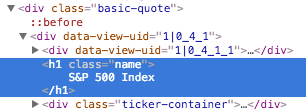

In [8]:
from IPython.display import display, Image
display(Image(filename='webscraping.png'))

In [11]:
soup = BeautifulSoup(page,'html.parser')
# we have a variable, soup, containing the HTML of the page.  we can start coding the part that extracts the data
# Take out the <div> of name and get its value by using find()
# In this case, since the HTML class name is unique on this page, we can simply query <div class="name">
name_box = soup.find('h1', attrs={'class': 'companyName__99a4824b'}) #<h1 class="companyName__99a4824b">S&amp;P 500 Index</h1>
#After we have the tag, we can get the data by getting its text.
name = name_box.text.strip() # strip() is used to remove starting and trailing
print (name)

In [ ]:
# get the index price
price_box = soup.find('span', attrs={'class':'priceText__1853e8a5'}) ##<span class="priceText__1853e8a5">2,803.69</span>
price = price_box.text
print (price)

In [ ]:
import csv
from datetime import datetime
#At the bottom of your code, add the code for writing data to a csv file.
# open a csv file with append, so old data will not be erased
with open('index.csv', 'a') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, price, datetime.now()])

#PYTHON3
data.append((name, price))
import csv 
from datetime import datetime

with open('index.csv', 'a') as csv_file:
    writer = csv.writer(csv_file)
    for name, price in data:
        writer.writerow([name, price, datetime.now()])
        writer.writerow('')

#### WebScraping Multiple indexes

In [ ]:
#Multiple Indexes
quote_page = ['http://www.bloomberg.com/quote/SPX:IND', 'http://www.bloomberg.com/quote/CCMP:IND']
#change the data extraction code into a for loop, which will process the URLs one by one and store all the data into a variable data in tuples.

data = []
for pg in quote_page:
    page = urllib2.urlopen(pg)  # query the website and return the html to the variable ‘page’
    soup = BeautifulSoup(page, 'html.parser') # parse the html using beautiful soap and store in variable `soup`
    name_box = soup.find('h1', attrs={'class': 'name'}) # Take out the <div> of name and get its value
    name = name_box.text.strip() # strip() is used to remove starting and trailing
    price_box = soup.find('div', attrs={'class':'price'}) # get the index price
    price = price_box.text
    data.append((name, price)) # save the data in tuple

In [ ]:
#Also, modify the saving section to save data row by row.

# open a csv file with append, so old data will not be erased
with open('index.csv', 'a') as csv_file:
    writer = csv.writer(csv_file)
    for name, price in data:
        writer.writerow([name, price, datetime.now()])